#Tülomsaş Train Traction Motor

##Ratings

- **Power :** 142-152 kW
- **Voltage :** 800-1100 V
- **Speed :** 374- 3120 rpm
- **Mass:** 1560 kg
- **Motor type:** Three phase IM

[Here](http://www.tulomsas.com.tr/main.php?kid=198&rid=101) you can find the related info about Tülomsaş's motor. 

![motor_picture](http://www.tulomsas.com.tr/upload/resim/101.jpg)



Since the phase voltages and synchronous speeds are variable, constant V/f technique can be used to keep the max. torque constant during various speeds. Thus, in this design parameters are calculated according to one voltage and frequency which are in between the limit values.

- ##Stator Core

In the below cell we defined basic characteristic operating values and selected power factor, efficiency and pole number. 

In [1]:
from math import sqrt,sin,cos,pi,tan
Pn=150e3 #Power
pf= 0.85 #Power-factor cos(phi) from Fig. 16.1
eff = 0.93 #targeted efficiency
n_s=1250 #synchronous speed
Vll=950 #Line voltage for Y connection
Vph = Vll/sqrt(3) #phase voltage
m=3 #number of phase
freq=50 #supply frequency
poles=(120*freq)/n_s #number of poles
pp=poles/2 #number of pole pairs
ke= 0.98-0.005*pp #from eq. 15.1
print poles
print ke
print Vph

4
0.97
548.48275573


**Number of poles** is calculated as $4$

Now we calculate air-gap apparent power and stator bore diameter with respect to predefined coefficients.     

In [2]:
Sgap=ke*Pn/(eff*pf) #Apparent airgap power 
print Sgap
C_0=235e3 # Esson's constant (J/m^3) from fig. 14.14
lmbd=1.6 # Stack aspect ratio from table 15.1
Dis=((2*poles*pp*Sgap)/(pi*lmbd*freq*C_0))**(1/3.0) #stator bore diameter
print Dis

184060.721063
0.368064947789


**Apparent airgap power** is calculated as $184.06 kVA$ 

Therefore **stator bore diameter** is obtained as $0.368  m$

**Slot pitch** is calculated as $0.025 m$

In [3]:
tau=pi*Dis/(2*pp) #pole pitch
L=lmbd*tau #stack length
q=4 #slots per pole per phase value(larger q gives better performance-smaller space field harmonics and losses)
tau_s=tau/(m*q) #stator slot pitch 
print tau
print L
print tau_s

0.289077534005
0.462524054407
0.0240897945004


Outer stator diameter is calculated according to inner/outer diameter ratios given in the Ion Boldea's [book](http://www.amazon.ca/The-Induction-Machine-Handbook-Boldea/dp/0849300045)

Also air-gap is calculated

In [4]:
import math
K_D= 0.62 #selected from table 15.2 for 4 poles
Dout=Dis/K_D #external stator diameter
print Dout
g=(0.1+0.012*math.pow(Pn,1.0/3.0))*1e-3 #air-gap 
print g

0.593653141596
0.00073759514151


**Outer diameter** is calculated as $0.59 \ m$

**air-gap** value for pole number $\geq 2$ is calculated by using eq.15.5


- ##Stator Winding

In [5]:
Ns=2*pp*q*m #Number of stotor slots
print Ns


48


Two-layer winding with chorded coils, y/$\tau$=5/6=10/12 is chosen as 5/6=0.0.83 is close to 0.8, which would reduce the first (5$^{th}$ order) stator mmf space harmonic.

In [6]:
alpha_e=(2*pi*pp)/Ns
print alpha_e

0.261799387799


Electrical angle between emfs in neighboring slots is shown above cell by *alpha_e* 

it equals to:

##$\alpha_{ec} = \frac{2*\pi*p1}{N_{s}}= \frac{2\pi2}{48} = \frac{\pi}{12}$


Stator winding factor calculation :

In [7]:
K_q1=sin(q*alpha_e/2.0)/(q*sin(alpha_e/2.0)) #distribution factor or zone factor from eq. 15.8
print K_q1
K_y1=sin(pi/2.0*10/12) #pitch factor or chording factor from eq. 15.9
print K_y1
K_w1=K_q1*K_y1 # stator winding factor
print K_w1

0.957662196943
0.965925826289
0.925030648888


$B_{g}=0.68 \ sample \ air \ gap \ flux \ density \ selected \ from \ eq. \ 15.11$

Pole spanning coefficient $\alpha_{i}$ depends on the tooth saturation factor $1+K_{st}$

Now we can consider $1+K_{st}=1.4$, with {alpha_i=0.729} $K_{f}=1.085$

$$Pole flux= \phi =\alpha_{i}*\tau*L*B_{g}$$

In [8]:
B_g=0.68
alpha_i=0.729 # Pole spanning coefficient, Fig. 14.13
flux_pole=alpha_i*tau*L*B_g #flux per pole from eq. 15.10
print flux_pole

0.066280397793


In [9]:
K_f=1.085
W_1=ke*Vph/(4*K_f*K_w1*freq*flux_pole) # Number of turns per phase from eq. 15.12 
print W_1

39.9883744075


####The number of conductor paths in parallel is defined as:
$$n_{s}= \frac{a_{1}*W_{1}}{p1*q}$$




In [10]:
a1=1
ns=a1*W_1/(pp*q) # Number of conductors per slot
print ns

4.99854680094


In [11]:
ns=4 #ns should be an even number because there are two distinct coils per slot in a double layer winding
W_1=pp*q*ns #recalculate the actual number of turns per phase
print W_1

32


In [12]:
B_g=B_g*39.98/32 #recalculate the actual air-gap flux density
print B_g

0.849575


Wire cross-section and diameter are calculated by using rated current and selected current density below:

In [13]:
I_ln=Pn/(sqrt(3)*Vll*pf*eff) #rated current(Iln) from eq. 15.16
print I_ln
J_cos=6 #current density value selected from eq. 15.17
A_co=I_ln/(J_cos*a1) #magnetic wire cross section in mm^2 (eq. 15.18)
print A_co
d_co=sqrt(4*A_co/pi)
print d_co

115.320137659
19.2200229432
4.94688722956


Since $d_{co}$ value is bigger than 1.3 mm, choose $a_{p}=2$

In [14]:
ap=2 #number of conductors in parallel
d_co=sqrt(4*A_co/pi*ap) 
print d_co

6.99595501157


In order to meet the requirements we selected **AWG1** wire which has diameter of $7.348 \ mm$ 

**Magnetic** and **electrical** loading values:

In [15]:
E_load=m*2*W_1*I_ln/(pi*Dis*L) #electrical loading (A/m^2)
print E_load
M_load=(flux_pole*2*pp)/(pi*Dis*L) #magnetic loading (T or Wb/m^2)
print M_load

41399.7505462
0.49572


- ##Stator Slot Sizing

In [16]:
K_fill=0.44 #fill factor for round-type wire
A_useful=pi*(d_co**2)*ap*ns/(4*K_fill) 
print A_useful


698.909925206


We choose **rectangular shape** for the stator slots among the recommended geometries. It can be seen on the figure below

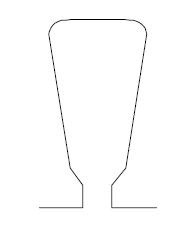

In [17]:
from IPython.display import Image
Image(filename='rectangular.png')

$Rectangular \ stator \ slot \ shape$

Also we assume that all flux passes through the stator teeth. Therefore:

$$B_{g}* \tau_{s}*L = B_{ts}*b_{ts}*L*K_{Fe} $$

In [21]:
Kfe=0.96 #taking lamination insulation thickness into account 
B_ts=1.55 #tooth flux density determined from 1.5-1.65T range
b_ts=B_g*tau_s*L/(B_ts*L*Kfe) #stator tooth width 
print b_ts
b_os=2.2e-3 #shown detailed in fig. 15.5
h_os=1e-3 #shown detailed in fig. 15.5
h_w=1.5e-3 #shown detailed in fig. 15.5
b_s1=pi*(Dis+2*h_os+2*h_w)/Ns-b_ts #lower slot width in (m) 
print b_s1

0.00809468901223
0.0163223547229


From the selected geometry,useful area $A_{su}$ can be defined as follows:
$$A_{su}=h_{s}\frac{(b_{s1}+b_{s2})}{2}$$

In [22]:
b_s2=sqrt(4*A_useful*1e-6*tan(pi/Ns)+b_s1**2) #upper slot width in (m)
print b_s2
hs=2*A_useful*1e-6/(b_s1+b_s2) #Slot useful height in (m)
print hs
H_ts=1760 #magnetic field intensity for previosly selected B_ts=1.55 T (adopted from the table 15.4)
F_mts=H_ts*(hs+h_os+h_w) #stator tooth mmf 
print F_mts
F_mg=1.2*g*B_g/(4*pi*1e-7) #air-gap mmf 
print F_mg

0.0212050741681
0.0372479514776
69.9563946005
352.175738315


Here,these calculated values above are related to the last version of updating Bg=0.50 in order to satisfy required condition.

In order to support calculated geometric values with visual content, *Figure 15.5* given below:

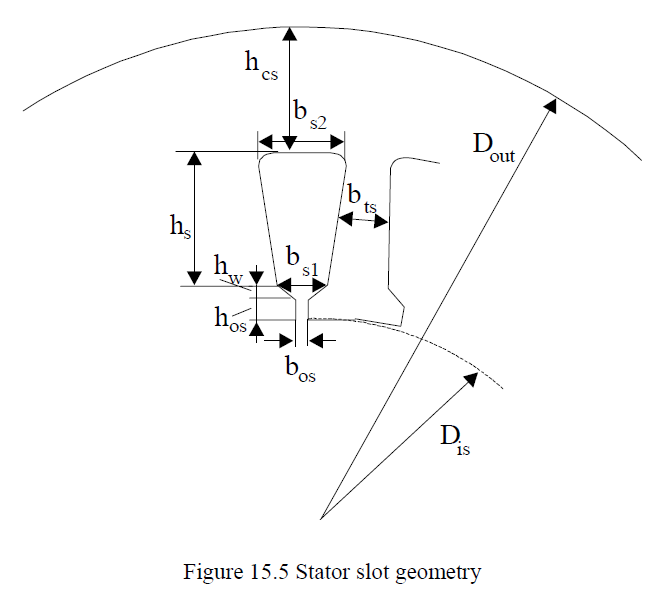

In [20]:
from IPython.display import Image
Image(filename='slot_geo.png')

In [23]:
K_st=1.4-1.0 
F_mtr=K_st*F_mg-F_mts #rotor tooth mmf 
print F_mtr

70.9139007256


We decreased the $B_{g}$ value to $0.5\ T$  to satisfy the condition:

$$F_{mtr} \approx F_{mts}$$

final values:

$F_{mts}=69.9 \quad A-t$

$F_{mtr}=70.9 \quad A-t$

In [20]:
B_g=0.5

In [24]:
h_cs=(Dout-(Dis+2*(h_os+h_w+hs)))/2 #stator back iron height 
print h_cs
B_cs=flux_pole/(2*L*h_cs) #back core flux density 
print B_cs

0.0730461454256
0.980897173437


Our calculated **Back-core flux density**$\approx$ 1 T------>**this can be considered as reasonable value** 

- ##Rotor Construction

####To avoid parasitic torque, additional losses, radial forces, noise, and vibration care must be exercised in choosing the correspondence between the stator and rotor number of slots. Therefore we choose stator/rotor slot combinations according to Table 15.5 : 
$$N_{s}=48$$
$$N_{r}=44$$

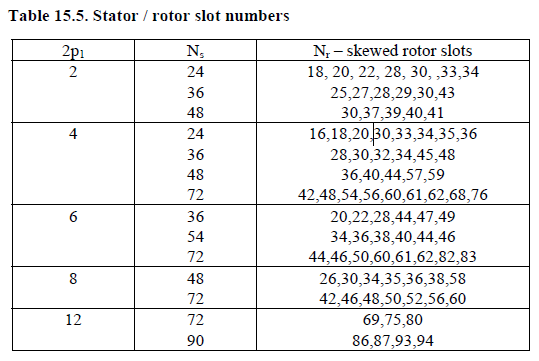

In [77]:
from IPython.display import Image
Image(filename='slot_number.png')

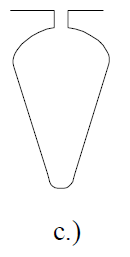

In [24]:
Image(filename='rotor_slot.png')

Figure 15.6c is adopted for the rotor slot shape

In [25]:
Nr=44 #rotor slot is selected from table 15.5
K1=0.8*cos(flux_pole)+0.2 
I_b=K1*(2.0*m*W_1*K_w1)/Nr*I_ln # rated rotor bar current in A
print I_b

464.671757581


In [26]:
Jb=4 #current density in the rotor bar (A/mm^2)
A_b=I_b/(Jb*10**6) #rotor slot area (m^2)
print A_b

0.000116167939395


In [27]:
I_endr=I_b/(2*sin(pi*pp/Nr)) # End ring current (A)
print I_endr
Jcr=0.8*Jb  #end ring current density in (A/mm^2)
A_cr=I_endr/(Jcr*10**6) #end ring cross section area in (m^2)
print A_cr
h_or=0.5e-3 #determined from fig. 15.7
b_or=1.5e-3 #determined from fig. 15.7
tau_r=pi*(Dis-2*g)/Nr #rotor slot pitch 
print tau_r

1632.54852136
0.000510171412924
0.0261744474787


In [28]:
B_tr=1.60 # rotor tooth flux density
b_tr=0.45/(Kfe*B_tr)*tau_r #tooth width of rotor in (m)
print b_tr


0.00766829515977


Rotor diameter is:
$$D_{re}=D_{is}-2g$$

In [29]:
D_re=Dis-2*g # Rotor diameter (m)
print D_re
d1=(pi*(D_re-2*h_or)-Nr*b_tr)/(pi+Nr) #d1 diameter from fig. 15.7
print d1

0.366589757506
0.0172062305009


Diameter $d_{1}$ is calculated above.
Now we have two different equations between $d_{1}$ and $d_{2}$ : 

$$A_{b}=\frac{\pi}{8}(d_{1}^2+d_{2}^2)+\frac{(d_{1}+d_{2})h_{r}}{2} \quad \quad \quad \quad ...(15.43)$$

$$d_{1}-d_{2}=2h_{r}tan(\frac{\pi}{N_{r}})\quad \quad \quad \quad \quad  \quad \quad \quad ...(15.44)$$

If solve these two equations $d_{2}$ becomes:

$$d_{2}=\sqrt(\frac{8A_{b}tan(\frac{\pi}{N_{r}})-\pi tan(\frac{\pi}{N_{r}})d_{1}^2}{\pi tan(\frac{\pi}{N_{r}})-2})$$

and $h_{r}$ : 

$$h_{r}=\frac{(d_{1}-d_{2})}{2tan(\frac{\pi}{N_{r}})}$$

In [30]:
d2=sqrt((8*tan(pi/Nr)*A_b-pi*tan(pi/Nr)*(d1**2)/(pi*tan(pi/Nr)-2))) #d2 diameter from fig. 15.7
print d2 
hr=(d1-d2)/(2*tan(pi/Nr)) #slot height of rotor in (m)
print hr

0.0101949960083
0.0490149337092


Verifying the rotor teeth mmf $F_{mtr}$

In [31]:
H_tr=2460 #magnetic field intensity for previosly selected B_ts=1.60 T (adopted from the table 15.4)
F_mtr=H_tr*(hr+h_or+(d1+d2)/2) #rotor teeth mmf in (Ampere-Turn)
print F_mtr
B_cr=1.65 #rotor back core flux density selected from 1.4-1.7 T range
h_cr=(flux_pole/2*L*B_cr) #back core height of rotor  in (m)
print h_cr
D_shaftmax=Dis-2*g-2*(h_or+(d1+d2)/2+hr+h_cr) # Maximum diameter shaft in (m)
print D_shaftmax

155.510245531
0.0252914296099
0.189575804359


In general, from the geometry shown in fig.15.8

$$D_{re}-D_{cr}=(3-4)10^-3 \quad m$$

$$b=(1.0-1.2)(h_{r}+h_{or}+\frac{(b_{1}+b_{2})}{2})$$

In [32]:
b=1.1*(hr+h_or+(d1+d2)/2) #from the geometry shown in fig.15.8 (m)
print b
a=A_cr/b # from the geometry shown in fig.15.8 (m)
print a

0.0695371016601
0.00733667927976


In order to support calculated geometric values with visual content, Figure 15.7 given below:

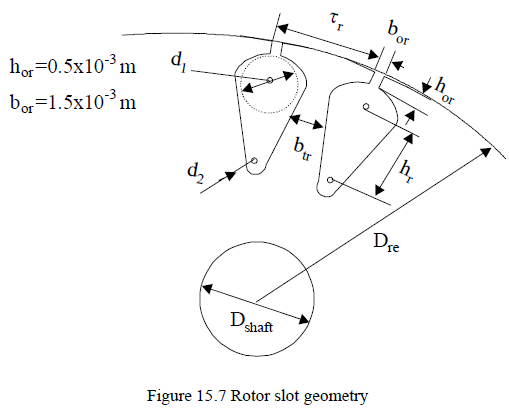

In [33]:
Image(filename='rotor_geo.png')

- ##Magnetization Current 

####Calculation of Carter's coefficient:

In [33]:
y_1=(b_os**2)/(5*g+b_os) 
print y_1
K_c1=tau_s/(tau_s-y_1) 
print K_c1
y_2=(b_or**2)/(5*g+b_or) 
print y_2
K_c2=tau_r/(tau_r-y_2) 
print K_c2
Kc=K_c1*K_c2 #total Carter's coefficient
print Kc

0.000822014260996
1.03532843497
0.000433695168759
1.01684858172
1.05277225071


In [34]:
H_cs=482 #stator back core flux intensity is adopted from the table 15.4 according to calculated Bcs of 1.32 T
H_cr=3460 #rotor back core flux intensity is adopted from the table 15.4 according to calculated Bcr of 1.65 T
Ccs=0.88*2.71**(-0.4*B_cs**2)
Ccr=0.88*2.71**(-0.4*B_cr**2)
F_mcs=(Ccs*pi*H_cs*B_cs*(Dout-h_cs))/(2*pp)  #stator back core mmf in (AT)
F_mcr=(Ccr*pi*H_cr*B_cr*(D_shaftmax+h_cr))/(2*pp) #rotor back core mmf in (AT)
print F_mcs
print F_mcr

115.909467076
286.285420733


####Magnetization mmf $F_{lm}$ is

$$F_{lm}=2(K_{c}g \frac{B_{g}}{\mu_{0}}+F_{mts}+F_{mtr}+F_{mcs}+F_{mcr})$$

In [35]:
F_1m=2*((Kc*g*B_g)/(4*pi*(10**-7))+F_mts+F_mtr+F_mcs+F_mcr) #magnetization mmf (AT), Eq. 15.52
print F_1m

1873.257797


In [36]:
K_s=F_1m/(2*F_mg)-1.0 #total saturation factor from eq.15.61
print K_s

1.65954975485


**Magnetization current** is given by a formula as follows:

$$I_{\mu}=\frac{\pi p1(F_{lm}/2)}{3\sqrt2 W_{1}K_{w1}}$$

In [37]:
I_mag=(pi*pp*(F_1m/2))/(3*sqrt(2)*W_1*K_w1) #magnetization current in (A) from eq. 15.62
print I_mag
I_pu=I_mag/I_ln #Per-unit value of magnetization current from eq. 15.62'
print I_pu

46.860300403
0.406349674517


- ##Resistance and Inductance parameters calculation

Resistances and inductances values that has been calculated here refer to the equivalent circuit (*Figure 15.9*) 

Stator phase resistance:
$$R_{s}=\rho_{Co}\frac{l_{c}W_{1}}{A_{co}a_{1}}$$

where

$l_{c}=2(L+l_{end})     \quad (coil \ length)$

Generally, end connection lenght depends on the coil span y, number of poles, shape of coils and number of layers in the winding. Thus, we choose our **end connection length** formula according to number of poles as follows:

$$l_{end}=2y+-0.02 \ m \ for \ 2p_{1}=4 \ poles $$



In [38]:
y=(7.0/9.0)*tau #coil span value with 7/9 chording configuration
l_end=2*y-0.02 #calculating end connection length in (m)
l_c=2*(L+l_end) #calculating coil length in (m)
print l_end
rhoc20=1.78e-8 #resistivity of copper at 20 *C in (ohm.m)
rhoc80=rhoc20*(1+1/273*(80-20)) #resistivity of copper at 80 *C in (ohm.m) 
R_s=rhoc80*l_c*W_1/(A_co*1e-6*a1) # Stator phase resistance (ohm), Eq. 15.63
print R_s

0.429676164007
0.0528820642839


In [39]:
from math import sinh,cosh
rhoa20=3.1e-8 #aluminium resistivity at 20 *C in (ohm.m)
rhoa80=rhoa20*(1+1/273*(80-20)) #aluminium resistivity at 80 *C in (ohm.m)
D_cr=D_re-3.5e-3 #end ring diameter
l_cr=pi*(D_cr-b)/Nr #end ring part length (m)
s=1
beta_s=sqrt(2*pi*freq*(4*pi*1e-7)/(2*rhoa20)) # unit for this value is (m^-1)
ksi=beta_s*hr*sqrt(s) 
K_R=ksi*(sinh(2*ksi)+sin(2*ksi))/(cosh(2*ksi)-cos(2*ksi)) #skin effect resistance coefficient 
R_bc=rhoa80*(L/A_b*K_R+l_cr/(2*A_cr*(sin(pi*pp/Nr))**2)) #rotor bar/end ring segment equivalent resistance 
print R_bc

0.000514589710095


In [40]:
R_rprime=4.0*m/Nr*((W_1*K_w1)**2)*R_bc #rotor cage resistance reduced to the stator from eq. 15.74
print R_rprime
beta=7.0/9.0 # y/tau
lambda_s=(2.0/3.0*hs/(b_s1+b_s2)+2*h_w/(b_os+b_s1)+h_os/b_os)*((1+3*beta)/4) #slot connection coefficient for stator
C_s=1.0-0.033*(b_os**2)/(g*tau_s)
phi_1=pi*(6*beta-5.5) 
gama_ds=(0.14*sin(phi_1)+0.76)*1e-2 #chosen for q=4 
Kst=1.4-1
lambda_ds=0.9*tau_s*(q**2)*(K_w1**2)*C_s*gama_ds/(Kc*g*(1.0+Kst)) #stator slot differential connection coefficient from eq. 15.77
lambda_ec=0.34*(q/L)*(l_end-0.64*beta*tau) #specific geometric permeance coefficient
X_s1=2*4*pi*1e-7*2*pi*freq*L*(W_1**2)/(pp*q)*(lambda_s+lambda_ds+lambda_ec) #stator phase reactance (ohm)
print X_s1

0.122970763259
0.176346312903


In [41]:
from math import log
lambda_r=0.66+2.0*hr/(3.0*(d1+d2))+h_or/b_or #rotor slot,differential and end ring permeance coefficient
gama_dr=9.0*((6.0*pp/Nr)**2)*1e-2 
lambda_dr=(0.9*tau_r*gama_dr/(Kc*g))*((Nr/(6*pp))**2) 
lambda_er=2.3*(D_cr-b)/(Nr*L*4.0*math.pow(math.sin(math.pi*pp/Nr),2.0))*math.log10(4.7*(D_cr-b)/(b+2*a))
Kx=3.0/(2.0*ksi)*(sinh(2.0*ksi)-sin(2.0*ksi))/(cosh(2.0*ksi)-cos(2.0*ksi)) #skin effect coefficient (leakage reactance)
X_bc=2.0*pi*freq*4*pi*1e-7*L*(lambda_r*Kx+lambda_dr+lambda_er) #rotor bar leakage reactance in (ohm)
print X_bc
X_r1=4.0*m*((W_1*K_w1)**2)*X_bc/Nr #rotor leakage reactance in (ohm)
print X_r1

0.000577498360988
0.138003953126


For **S=1** , i.e when **speed is zero**, both stator and rotor leakage reactance values should be reduced due to leakage flux path saturation. To verify it:

In [42]:
X_s1sat=X_s1*0.75 #stator leakage reactance at zero speed in (ohm) from eq. 15.86
X_r1sat=X_r1*0.65 #rotor leakage reactance at zero speed in (ohm) from eq. 15.86
print X_s1sat
print X_r1sat


0.132259734677
0.0897025695322


At rated speed (rated slip condition):

In [43]:
R_bcsr=rhoa80*(L/A_b+l_cr/(2*A_cr*(sin(pi*pp/Nr))**2)) #rotor bar/end ring segment equivalent resistance (Kr=Kx=1 @rated slip)
print R_bcsr
R_rprimesr=R_rprime*(R_bcsr/R_bc) #rotor resistance calculated @rated slip
print R_rprimesr
X_bcsr=2.0*pi*freq*(4*pi*1e-7)*L*(lambda_r+lambda_dr+lambda_er) #equivalent rotor bar leakage reactance for rated slip condition
print X_bcsr
X_r1sr=X_r1*(X_bcsr/X_bc) #rotor leakage reactance calculated at rated speed via same manner 
print X_r1sr

0.000154868024511
0.0370085891826
0.000823676903446
0.196832885517


Magnetization reactance $X_{m}$ is calculated as follows:

In [44]:
X_m=sqrt((Vph/I_mag)**2-R_s**2)-X_s1 # Magnetization reactance (ohm), Eq. 15.88
print X_m

11.5281701535


#####Skewing effect 

$$Skewing factor=c=\tau_{s}$$

$$X_{m}=X_{m}K_{skew}$$

$$K_{skew}=\frac{sin(\frac{\pi\tau_{s}}{2\tau})}{\frac{\pi\tau_{s}}{2\tau}}$$

In [45]:
K_skew=sin(pi/2.0*tau_s/tau)/(pi/2.0*tau_s/tau) #skewing factor
print K_skew
X_m=X_m*K_skew #magnetization reactance corrected with skewing in (ohm)
print X_m
X_r1skew=X_m*(1.0-K_skew**2) #adjusting rotor leakage reactance with skewing in (ohm)
print X_r1skew
X_r1satskew=X_r1sat+X_r1skew #rotor leakage reactance at S=1 with skewing 
print X_r1satskew
X_r1srskew=X_r1+X_r1skew #rotor leakage reactance at rated slip S=Sn with skewing 
print X_r1srskew

0.99714665735
11.4952763339
0.0655063349514
0.155208904484
0.203510288078


- ##Lossed and Efficiency Parameters

Efficiency can be defined as follows:

\begin{equation}
  \eta = \frac{P_{out}}{P_{in}} = \frac{P_{out}}{P_{out}+\sum losses}
\end{equation}

In here loss components are:

\begin{equation}
  \sum losses = p_{Co}+p_{Al}+p_{iron}+p_{mv}+p_{stray}
\end{equation}

where;

$p_{Co}$ represents stator winding losses 

$p_{Al}$ represents aluminium rotor cage losses

$p_{mv}$ represents mechanical/ventilation losses

$p_{stray}$ represents stray losses

These loss components except iron losses can be calculated as follows,

In [46]:
p_co=3.0*R_s*(I_ln**2) #stator copper loss in (W)
print p_co
p_Al=3.0*R_rprimesr*(K1**2)*(I_ln**2) #rotor aluminium cage loss in (W)
print p_Al
p_mv=0.012*Pn #mechanical/ventilation loss for pole-pairs=2 in (W)
print p_mv
p_stray=0.01*Pn #Stray loss in (W)
print p_stray

2109.79354259
1471.31949486
1800.0
1500.0


Fundamental core losses($p_{iron}$) consists of teeth($p_{t1}$) losses and back iron($p_{y1}$) losses

$$p_{t1}=K_{1}p_{10}(\frac{f_{1}}{50})(B_{ts}^(1.7))G_{t1}$$

$$G_{t1}=stator \ weight=\gamma_{iron}N_{s}b_{ts}(h_{s}+h_{w}+h_{os})$$

$$p_{y1}=K_{y}p_{10}(\frac{f_{1}}{50})^(1.3)B_{cs}^(1.7)G_{y1}$$

$$G_{y1}=\gamma_{iron}\frac{\pi}{4}[D_{out}^2-(D_{out}-2h_{cs})^2]LK_{Fe}$$

The core losses are made of fundamental and additional(pulsation) iron losses. Here we'll calculate them respectively.

In [47]:
gama_iron=7800 #Iron density adopted from physical properties(kg/m^3)
G_t1=gama_iron*Ns*b_ts*(hs+h_w+h_os)*L*Kfe #stator tooth weight in (kg)
print G_t1
K_t=1.6 #coefficient for teeth
p_10=2 #specific losses (W/kg) at 50 Hz
p_t1=K_t*p_10*((freq/50.0)**(1.3))*(B_ts**(1.7))*G_t1 #stator teeth fundamental loss in (W)
print p_t1
K_y=1.6 #coefficient for yoke
G_y1=gama_iron*(pi/4.0)*(Dout**2-(Dout-2.0*h_cs)**2)*L*Kfe #back iron  weight in (kg)
print G_y1
p_y1=K_y*p_10*((freq/50.0)**(1.3))*(B_cs**(1.7))*G_y1 #stator back iron fundamental loss in (W)
print p_y1
p_ironf=p_t1+p_y1 #fundamental iron loss in (W)
print p_ironf


53.4879947214
360.553886756
413.768415261
1281.34841361
1641.90230036


In [48]:
B_ps=(K_c2-1)*B_g
B_pr=(K_c1-1)*B_g 
print B_ps
print B_pr
K_ps=1.0/(2.2-B_ts) 
K_pr=1.0/(2.2-B_tr) 
print K_ps
print K_pr
G_tr=gama_iron*L*Kfe*Nr*(hr+(d1+d2)/2.0)*b_tr # Rotor teeth weight (kg), Eq. 15.107
print G_tr
p_irons=0.5e-4*(((Nr*freq/pp*K_ps*B_ps)**2)*G_t1+((Ns*freq/pp*K_pr*B_pr)**2)*G_tr) #tooth flux pulsation/stray core loss in (W)
print p_irons
p_iron=p_ironf+p_irons #total core loss in (W)
print p_iron

0.00842429085864
0.0176642174831
1.53846153846
1.66666666667
73.2869876983
5.11703354967
1647.01933391


We calculated **total core loss** as shown above. $\ \ (1647 \ W)$

Total losses is:

In [49]:
P_totloss=p_co+p_Al+p_iron+p_mv+p_stray #calculating the total losses in (W)
print P_totloss

8528.13237137


###Comparison of targeted and computed efficiencies

In [50]:
eff_final=Pn/(Pn+P_totloss) #final computed efficiency
print eff_final

0.946204296715


The targeted efficiency was $\eta=0.93$ , so the design holds! $\surd$

*In addition to this we can also calculate the **motor mass components** as follows:*

In [51]:
G_s=G_t1+G_y1 #total stator weight in (kg)
print G_s
G_yr=gama_iron*math.pi/4.0*((D_re-2.0*h_or-2.0*(d1+d2)/2.0-2.0*hr)**2-(D_shaftmax**2.0))*L*Kfe #rotor back-iron weight in (kg)
G_r=G_tr+G_yr #total rotor weight (kg)
print G_r
G_ws=8960*l_c*W_1*A_co*1e-6*m #stator copper weight (kg) and 8960 is the density of the copper(kg/m^3) taken from the physical properties 
print G_ws
G_wr=2700*(A_b*L+l_cr*A_cr)*Nr #rotor aluminium weight (kg) and 2700 is the density of the aluminium(kg/m^3) taken from the physical properties 
print G_wr

467.256409982
132.41504419
29.5002343034
7.65350710536


In [52]:
mass_rough=G_s+G_r+G_ws+G_wr
print mass_rough

636.825195581


Therefore we computed "rough-estimation" value for the **motor mass**, which is $\approx 636 kg \ $

This value is important for both practical usefulness and cost point of view of designed machine.

- ##Operation Characteristics

The operation characteristics are defined here as active no load current I_a0, rated slip S_n, rated torque T_n, breakdown torque T_bk and starting current. These values are calculated as follows : 

In [53]:
I_a0=(p_iron+p_mv+3.0*(I_mag**2)*R_s)/(3.0*Vph) #no-load active current in (A)
print I_a0
S_n=p_Al/(Pn+p_Al+p_mv+p_stray) #rated slip (Sn)
print S_n
T_n=Pn/(2.0*pi*(freq/pp)*(1.0-S_n)) #rated shaft torque in (Nm)
print T_n
C_m=1.0+X_s1/X_m 
T_bk=3.0*pp/(2*2*pi*freq)*(Vph**2)/(R_s+sqrt((R_s**2)+((X_s1+C_m*X_r1)**2))) #breakdown torque in (Nm)
print T_bk
I_start=Vph/(sqrt((R_s+R_rprime)**2+(X_s1sat+X_r1sat)**2)) #starting current in (A)
print I_start

2.30659853711
0.0095064091956
964.094737631
7686.5395541
1936.86280701


In [54]:
T_start=3.0*R_rprime*(I_start**2)*pp/(2*pi*freq) #starting torque in (Nm) from eq. 15.116
print T_start
pf_final=Pn/(3.0*Vph*I_ln*eff_final) #computed power factor
print pf_final

8810.50831805
0.835443257597


#####Temperature rise

Winding temperature defined as follows:

$$\theta_{Co}=\theta_{amb}+\Delta\theta_{Co}+\Delta\theta_{frame}$$

$where,$

$\theta_{amb}$ is the ambient temperature and we assume it's $40^o C$ for this design

$\Delta\theta_{Co}$ is the temperature differential between the conductors in slots and the slot wall

$\Delta\theta_{frame}$ is the frame temperature rise with respect to ambient

In [55]:
h_ins=0.3e-3 #slot insulation thickness coefficient
lambda_ins=0.25 #insulation thermal conductivity coefficient in (W/mK)
alpha_cond=lambda_ins/h_ins #both coefficients shown above lumped together 
print alpha_cond
A_ls=(2.0*hs+b_s2)*L*Ns #stator slot lateral area in (m^2)
print A_ls
K_fin=3.0 #fin structure coefficient is used to extend surface area 
A_frame=pi*Dout*(L+tau)*K_fin #frame area including finn area in (m^2)
print A_frame

833.333333333
2.12467218959
4.20524774965


In [56]:
theta_amb=40 #ambient temperature in celcius degree(C)
delta_co=p_co/(alpha_cond*A_ls) #from eq. 15.121
print delta_co
alpha_conv=50.0*5 #selected from eq.15.123 according to 2p1=4 and multiplied by 5 due to forced cooling 
delta_frame=P_totloss/(alpha_conv*A_frame) # Frame temperature rise with respect to ambient air (C), Eq. 15.122
print delta_frame
theta_co=theta_amb+delta_co+delta_frame #winding temperature (C)
print theta_co


1.19159664419
8.11189530707
49.3034919513


###Meeting the restrictions

Our constraints about design was:

$\cos\phi_{ln}=0.85$ ---->we computed the power factor as 0.84, so it holds the requirements $\surd$

Temperature rise value is computed as $49.3^o C$ so this is below the allowed temperature rise limit of the predefined [Class B insulation](http://www.engineeringtoolbox.com/nema-insulation-classes-d_734.html) (Allowable Temperature Rise at full load = $80^o C$ ) $\surd$

The calculated efficiency is $\eta=0.94$ while targeted efficiency was $\eta=0.93$, so the design holds! $\surd$

- ##Koil Analysis

We can calculate and draw some of the induction motor parameter including winding diagram, winding layout, winding factors and harmonics, MMF and electrical loadings.

####Winding Diagram

Two-layer winding with chorded coils, y/$\tau$=5/6=10/12 is chosen to eliminate 3rd harmonics

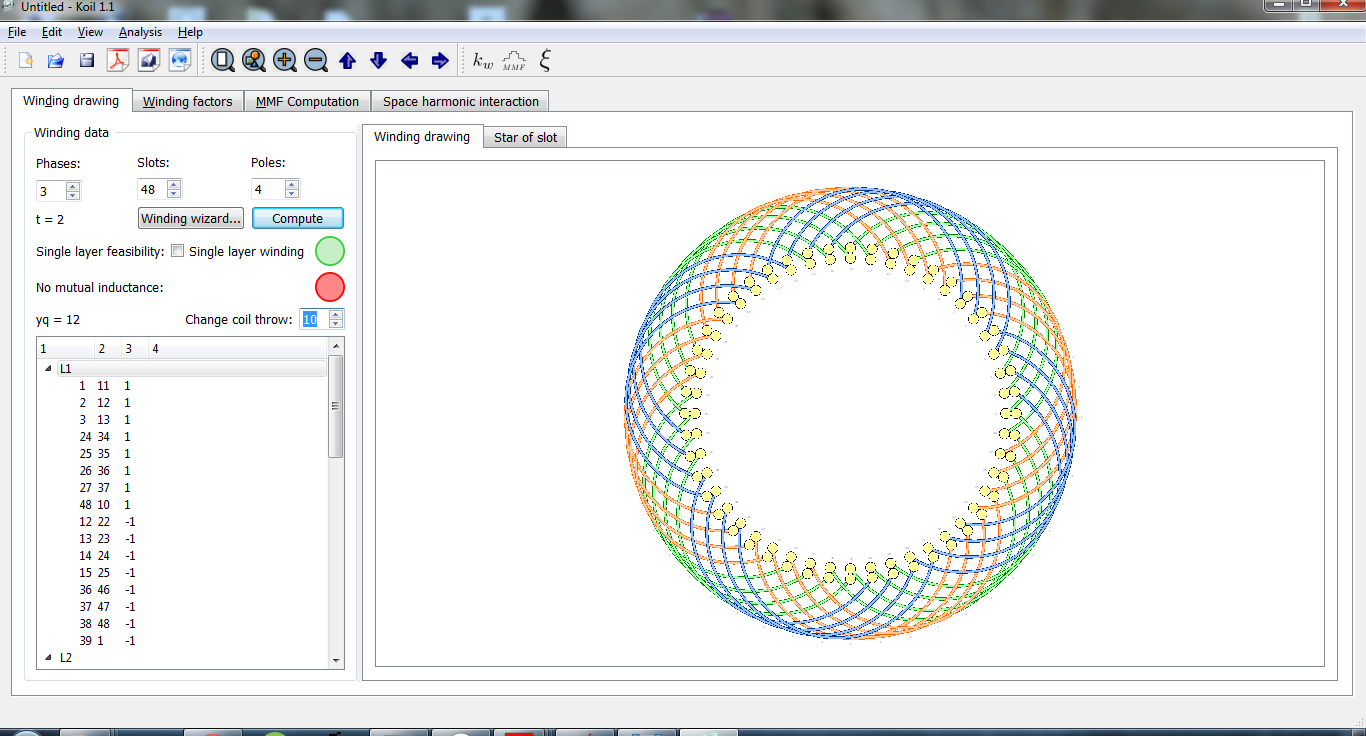

In [79]:
Image(filename='koil_wdgdiagram.png')

####Winding Factors 

Koil automatically calculates winding factors. You can see them in the figure below:

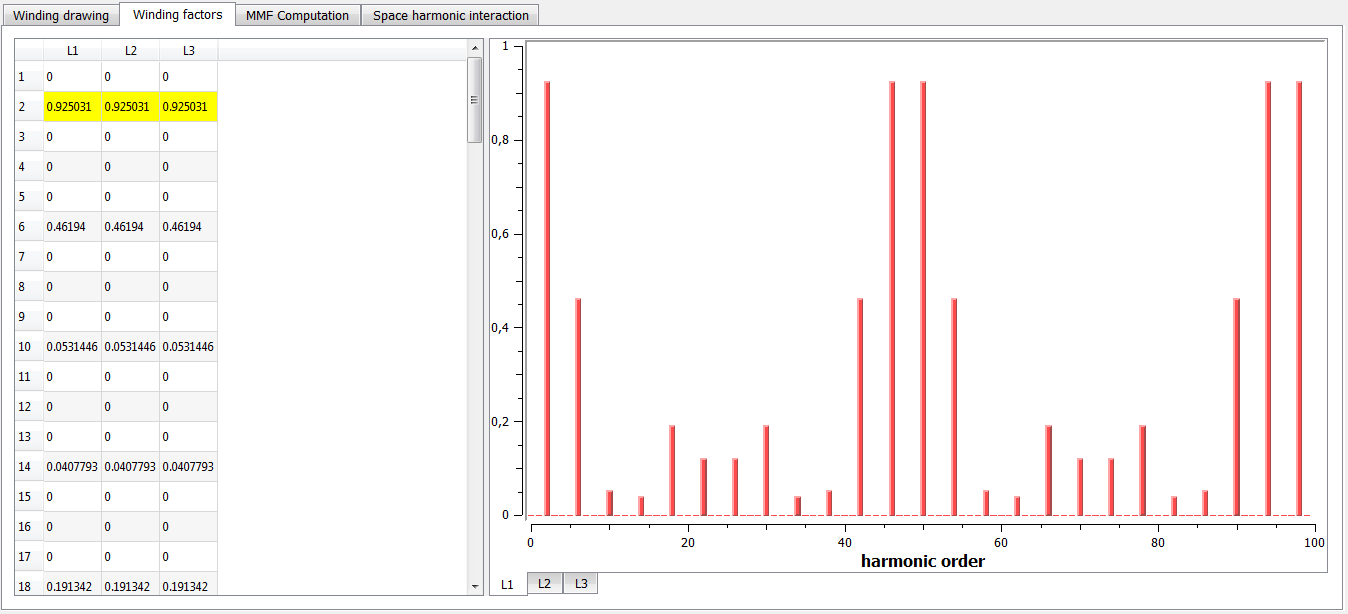

In [80]:
Image(filename='koil_windingfactors.png')

####MMF Diagrams

MMF calculation with Koil can be done by "Index of rotor losses" section under the "MMF Computation" title

You can see how these variables in the user-define area are calculated below cell.

In [57]:
f=freq  #Stator supply frequency (Hz)
print f 
D=Dis  #Stator bore diameter(m)
print D
ws=(b_s1+b_s2)/2.0 # The slot opening (m)
print ws
print g  #airgap (m)
conduct=1/(52e-4) # Conductivity of NO15 Sura (S/m) (datasheet is given in the file)
print conduct
mu_r=(1.0-0.1)/(99.0-35.0)/(4.0*math.pi*1e-7) # Linear relative permeability of NO15 Sura (datasheet is given in the file)
print mu_r

50
0.368064947789
0.0187637144455
0.00073759514151
192.307692308
11190.5819361


According to these values MMF diagram shown below:

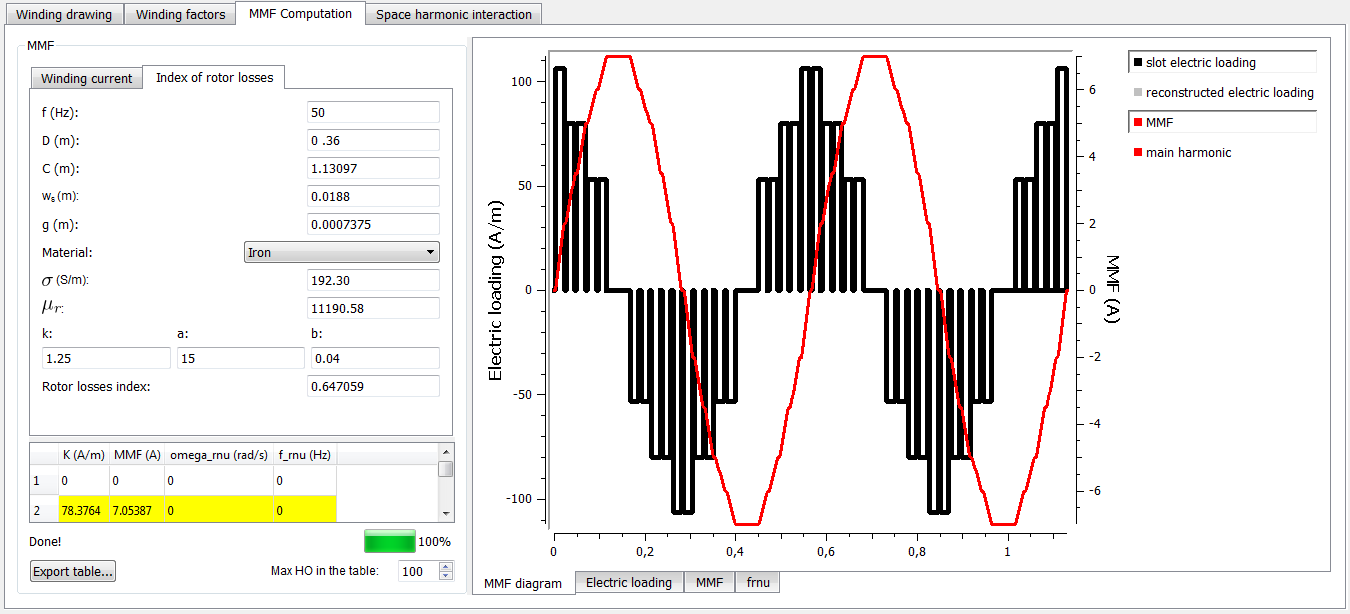

In [85]:
Image(filename='koil_mmf1.png')

Electric loading with respect to harmonics shown below:

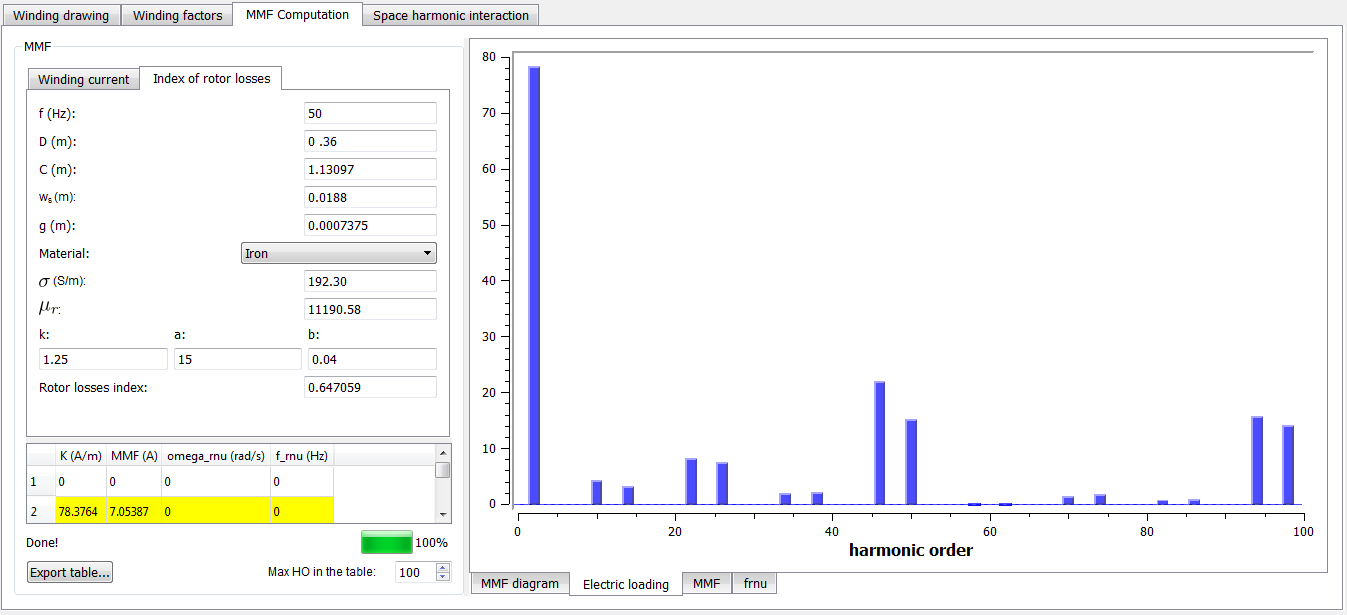

In [86]:
Image(filename='koil_loading.png')

MMF spectrum graph for the given stator winding structure:

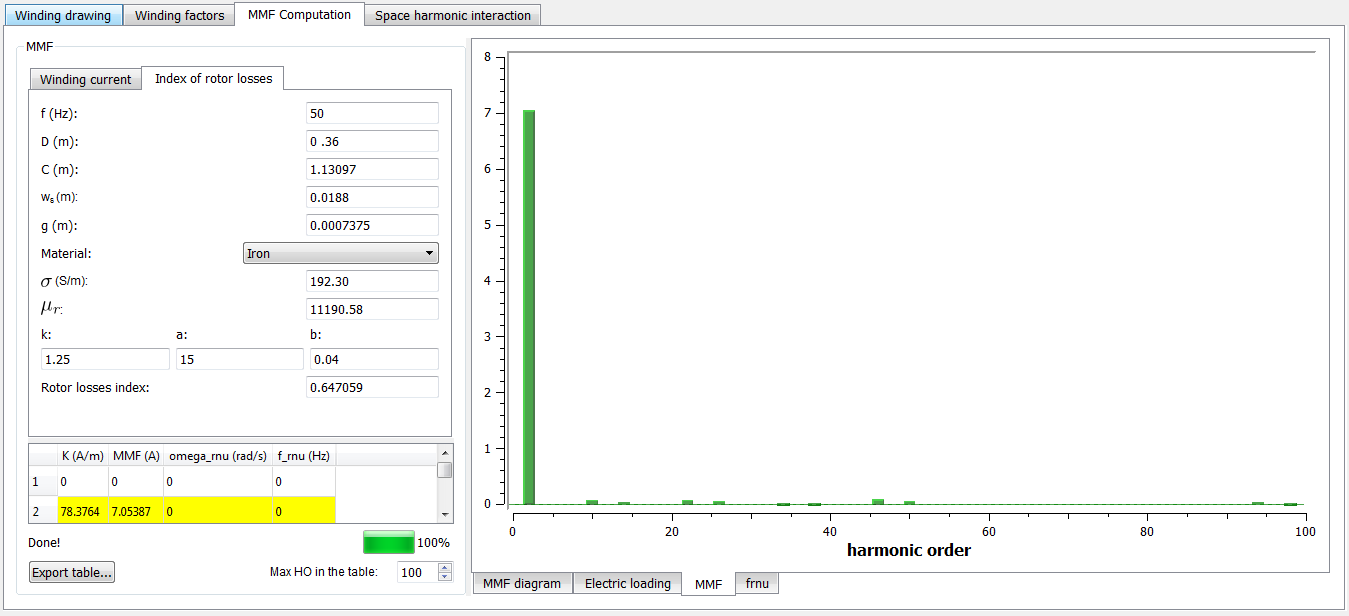

In [88]:
Image(filename='koil_mmf2.png')

$f_{rnu}$ spectrum graph for the given stator winding structure is given as follows,

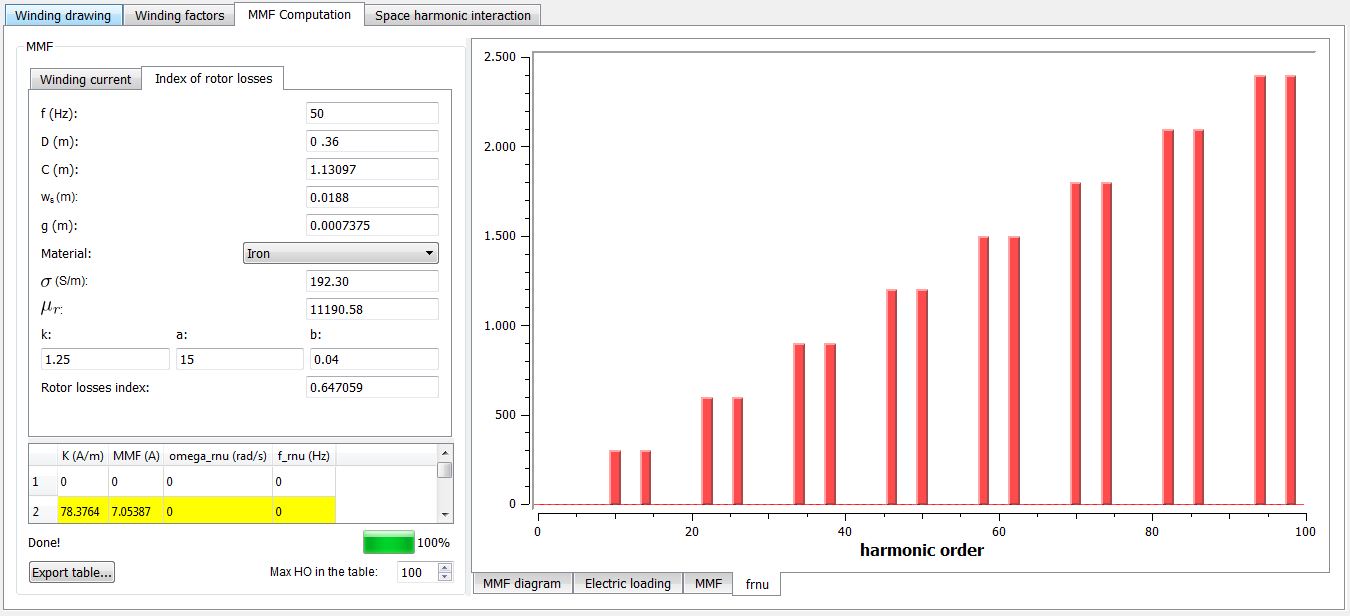

In [89]:
Image(filename='koil_frnudiagram.png')

Space harmonic interaction index is calculated as follows,

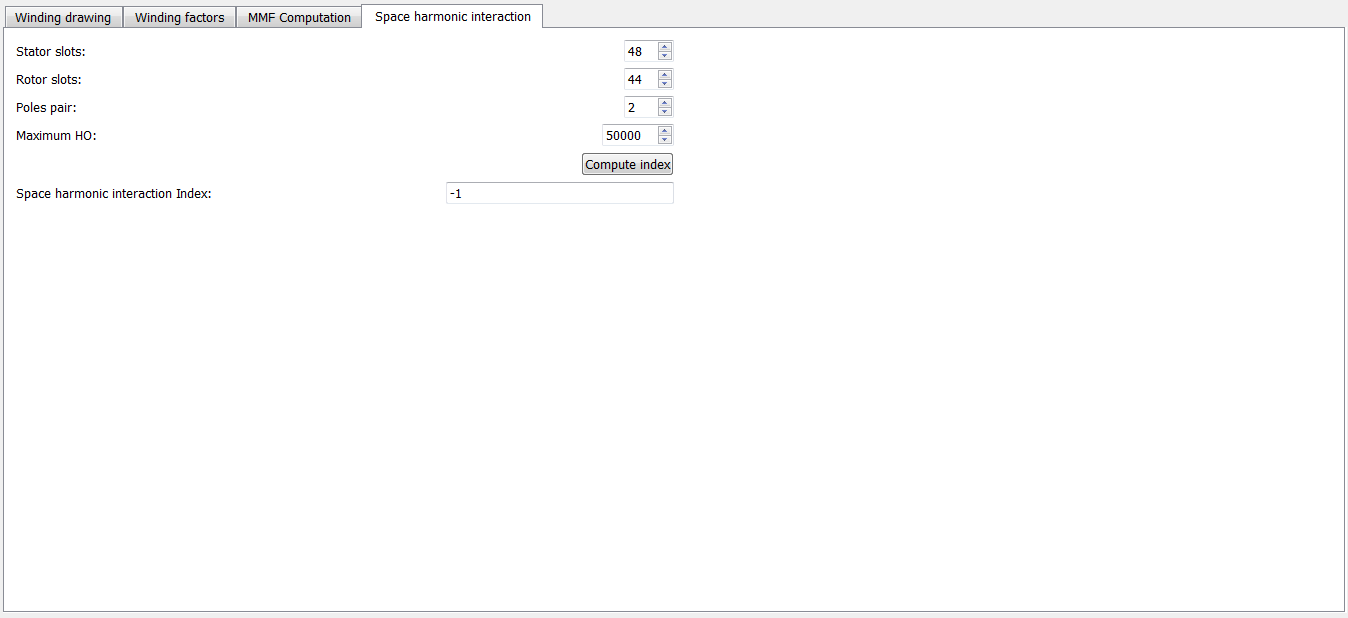

In [90]:
Image(filename='koil_spaceh.png')

- ##MotorAnalysis with MATLAB

Wit MotorAnalysis software, we can adjust motor parameters.

####Geometry Editor

In this section we will calculate motor geometry parameters which are needed by the software.

In [58]:
#For the stator part
#Choose---> slot type: Parallel tooth
#Choose---->Number of winding layers: Double layer
#Ns=48
#D1s=Dout--->Stator outer diameter (m)
#D2s=Dis--->Stator bore diameter (m)
Sds=hs+h_w+h_os #slot depth in (m)
print Sds
Ws=b_ts  #tooth width in (m)
print Ws
Ods=h_os  #slot opening depth in (m)
print Ods
Ows=b_os  #slot opening width in (m)
print Ows
Tas=math.atan(h_w/((b_s1-b_os)/2.0))*400.0/(2.0*math.pi)  #tooth tip angle in (grad)
print Tas
Rcs=(b_s2-b_s1)/2.0*math.sqrt(2.0)/2.0 #slot corner radius in (m)
print Rcs

0.0397479514776
0.00809468901223
0.001
0.0022
13.3255733023
0.00172630201518


In [59]:
#For the rotor part
#Nr=44
lag=g  #air-gap length in (m)
print lag
Dshaft=D_shaftmax #shaft diameter in (m)
print Dshaft
Tar=45.0*400.0/360.0 #tooth tip angle in (grad)
print Tar
Sdr=h_or+d1/2.0+hr+d2/2.0 #rotor slot depth in (m)
print Sdr
Wr=b_tr  #tooth width in (m)
print Wr
Odr=h_or  #slot opening width in (m)
print Odr
Owr=b_or  #slot opening width in (m)
print Owr
Rcr=d2/2  #slot corner radius in (m)
print Rcr
l=L #lamination length in (m)
print l
RBskew=math.atan(tau_s/L)*200.0/math.pi  #rotor bar skew in (grad)
print RBskew

0.00073759514151
0.189575804359
50.0
0.0632155469638
0.00766829515977
0.0005
0.0015
0.00509749800413
0.462524054407
3.31273468887


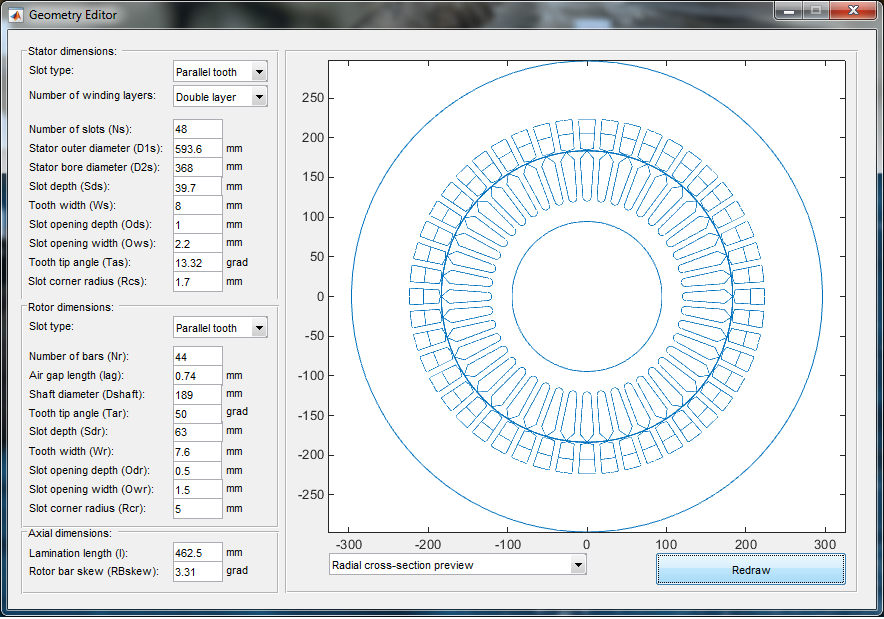

In [93]:
Image(filename='motoranalysis_geo.png')

For stator slot preview:

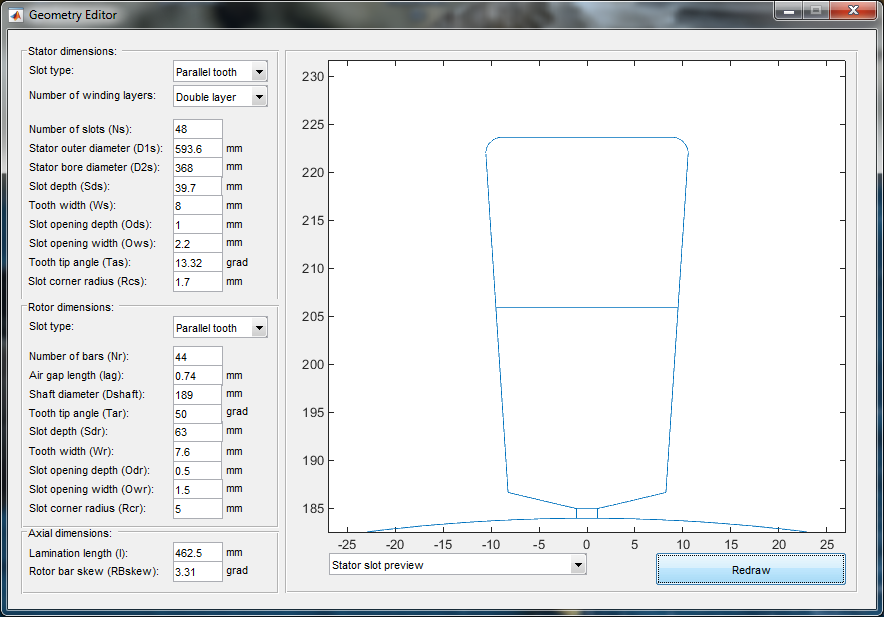

In [98]:
Image(filename='motoranalysis_stator.png')

For rotor slot preview:

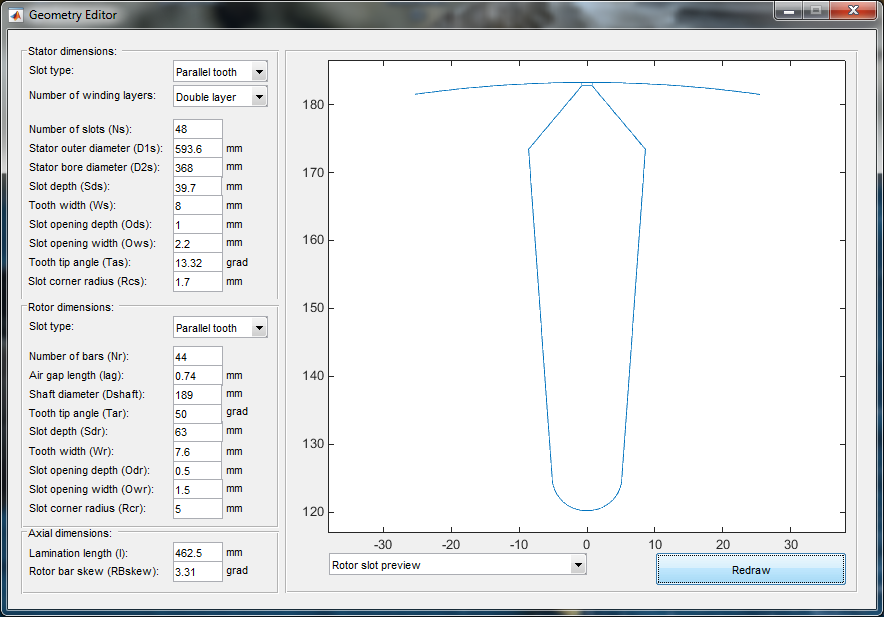

In [99]:
Image(filename='motoranalysis_rotor.png')

####Windings Property Editor

In this section we will calculate the stator and rotor circuits values and define layout schematic. 



In [60]:
#for stator winding
#Ns=48  
#winding layer=2  #double layer 
#Npp=1  #number of parallel paths
Lsew=X_s1/(lambda_s+lambda_ds+lambda_ec)*lambda_ec/(2.0*math.pi*freq) #end winding inductance in (H)
print Lsew
print R_s  #winding phase resistance in (ohm)
W=6  #number of conductors per slot
print W
fillfactor=K_fill #slot fill factor
print fillfactor
ks=1/rhoc80  #winding material conductivity in (S/m)
print ks

0.000125031733585
0.0528820642839
6
0.44
56179775.2809


In [61]:
#for rotor winding 
print Nr #number of bars
print RBskew #rotor bar skew in (grad)
kr=1/rhoa80 #bar material conductivity in (S/m)
print kr
Rre=R_bc #end ring resistance in (ohm)
print Rre

44
3.31273468887
32258064.5161
0.000514589710095


Winding layout is defined according to y/$\tau$=10/12 , double layer with chorded coils

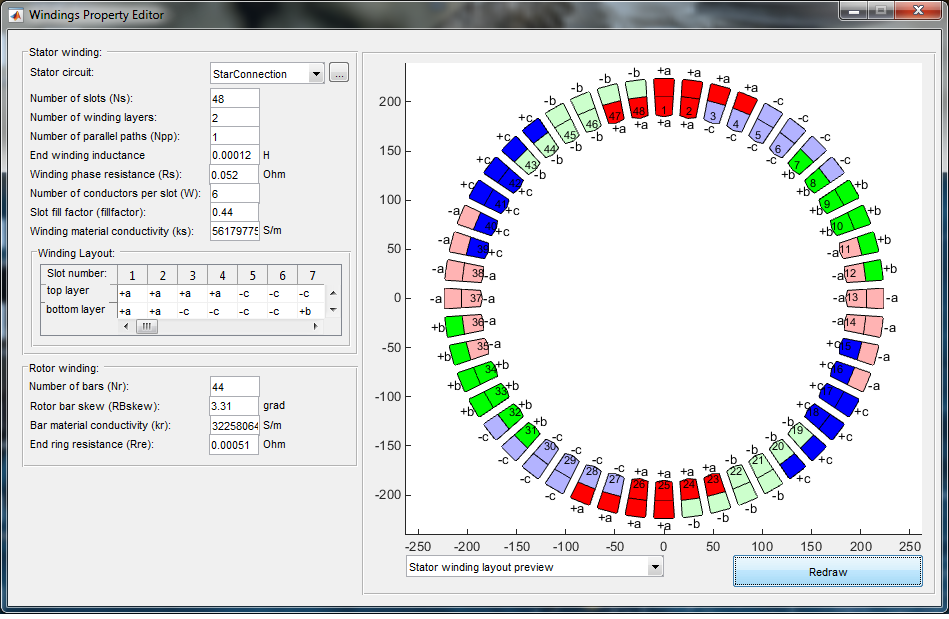

In [97]:
Image(filename='motoranalysis_wdglayout.png')

#### Iron Core Property Editor

In this section we define B-H curve parameters for the selected core material. In this design project we selected NO15 SURA steel. You can find its properties [here](http://cogent-power.com/cms-data/downloads/NO15.pdf)

In [62]:
#mu_r is calculated before (Linear relative permeability)
print mu_r
k_st=0.96 # Stacking factor
print k_st

11190.5819361
0.96


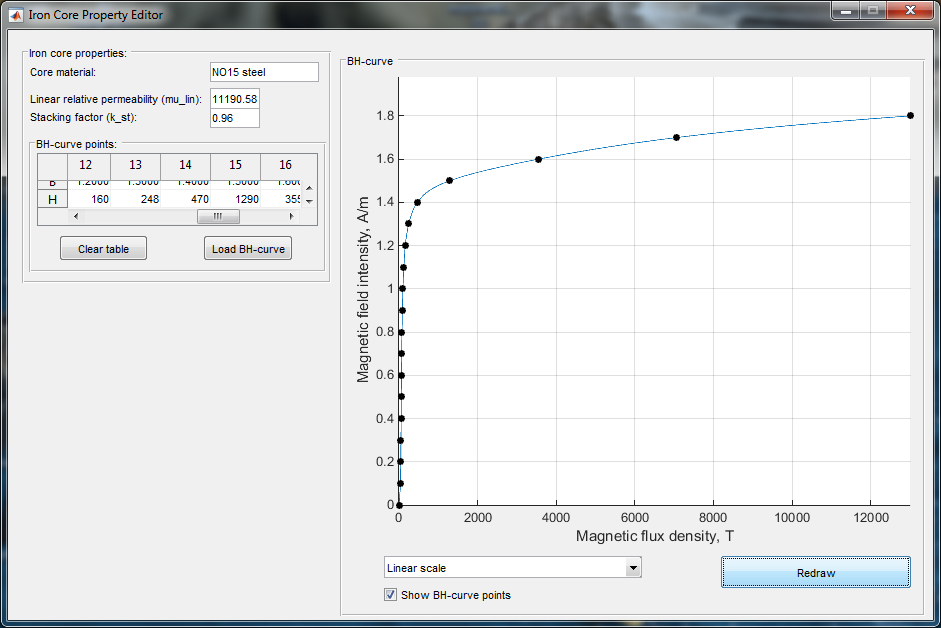

In [101]:
Image(filename='motoranalysis_bh.png')

####Mesh Editor

In this section software draws mesh plot for the simulation

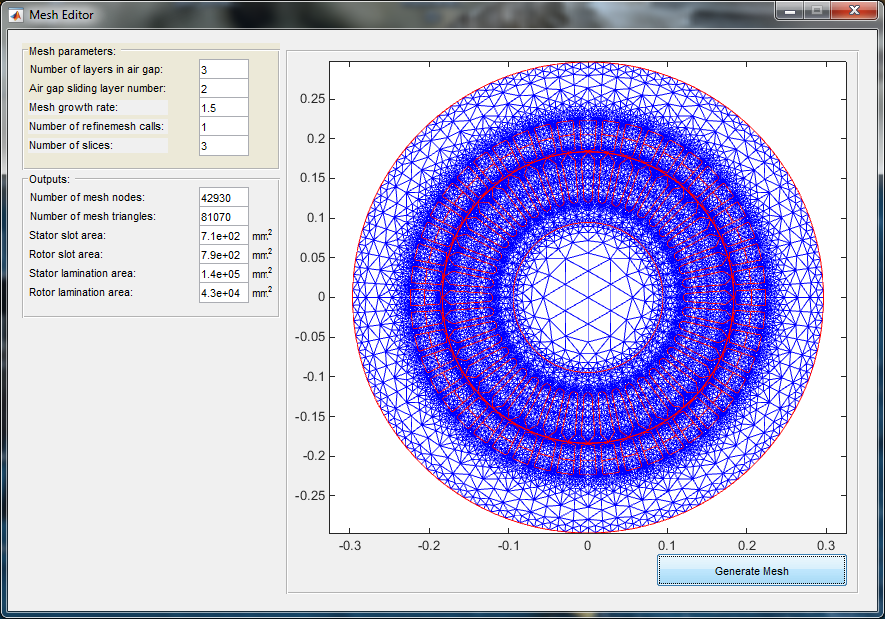

In [102]:
Image(filename='motoranalysis_mesh.png')

Moment of inertia calculation:

For the motor(rotor part), inertia is defined as follows,

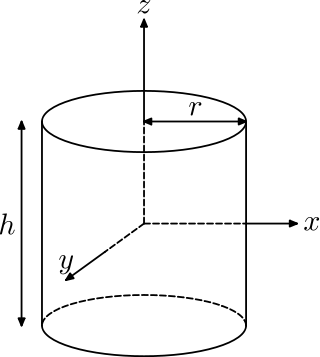

In [105]:
Image(filename='shape.png') 

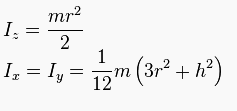

In [106]:
Image(filename='inertia.png')

In [63]:
rotor_m=math.pi*((D_re/2)**2)*L*7800 #mass
print rotor_m
inertia=(1.0/12.0)*rotor_m*(3.0*((D_re/2)**2)+L**2)
#inertia=(0.5)*rotor_m*(D_re**2)
print inertia

380.784674782
9.98669809729
